# <center> Классификация жестов
<img src='img/gesture_digits.png' width='70%'>

#### Для начала загрузите [датасет](https://drive.google.com/open?id=10cyJtEV6Zy_L6XMh0Ht1B6tY6soKfjEt) нажав "Скачать все"!
<br>
<br>
<br>
<br>

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# импортируем требуемые бибилиотеки

import torch
from source.network import NNClassifier, Softmax_layer, Flatten
from source.helpme import show_history, show_image, load_gestures, calculate_pad
import numpy as np
import torchvision
import os
from torchvision import transforms
from sklearn.model_selection import train_test_split

In [17]:
X, y = load_gestures('Dataset', size=(64, 64))

Dataset/0 загружен
Dataset/1 загружен
Dataset/2 загружен
Dataset/3 загружен
Dataset/4 загружен
Dataset/5 загружен
Dataset/6 загружен
Dataset/7 загружен
Dataset/8 загружен
Dataset/9 загружен


In [18]:
# разобьем выборку на тренировочную, валидационную и тестовую

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, shuffle=True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=17, shuffle=True)

print('Размер тренировочной выборки: %d' % len(X_train))
print('Размер валидационной выборки: %d' % len(X_valid))
print('Размер тестовой выборки: %d' % len(X_test))

X_train = np.transpose(X_train, (0, 3, 1, 2))
X_valid = np.transpose(X_valid, (0, 3, 1, 2))
X_test = np.transpose(X_test, (0, 3, 1, 2))

Размер тренировочной выборки: 1154
Размер валидационной выборки: 289
Размер тестовой выборки: 619


# Convolutional neural network

In [11]:
# определим архитектуру сети

conv_net = torch.nn.Sequential(# 32x32x3
                               
                               torch.nn.Conv2d(in_channels=3, 
                                               out_channels=10, 
                                               kernel_size=3, 
                                               stride=2, 
                                               padding=1),
                               torch.nn.ReLU(),
                               torch.nn.BatchNorm2d(10),
                               # 32x32x10

                               torch.nn.Conv2d(10, 20, 3, stride=2, padding=1),
                               torch.nn.ReLU(),
                               torch.nn.BatchNorm2d(20),
                               # 8x8x20

                               torch.nn.Conv2d(20, 40, 3, stride=2, padding=1),
                               torch.nn.ReLU(),
                               torch.nn.BatchNorm2d(40),
                               # 4x4x256

                               torch.nn.Conv2d(40, 80, 3, stride=2, padding=1),
                               torch.nn.ReLU(),
                               torch.nn.BatchNorm2d(80),
                               # 4x4x256

                               Flatten(),
                               torch.nn.Linear(640, 10))

In [12]:
# определим модель с удобным функционалом

model = NNClassifier(conv_net, lr=1e-4)

In [13]:
# обучим нейросеть

model.fit(X_train, y_train, epochs=50, batch_size=256, 
          valid_data=(X_valid, y_valid))

A Jupyter Widget

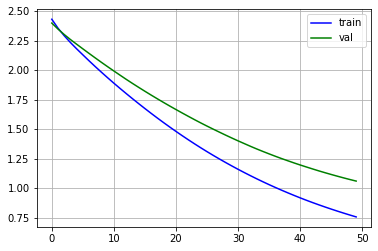

In [14]:
# посмотрим на кривые обучения

model.show_history()

In [15]:
# проверим точность модели (должно быть не меньше 0.81)

model.evaluate_score(X_test, y_test)

0.7092084006462036

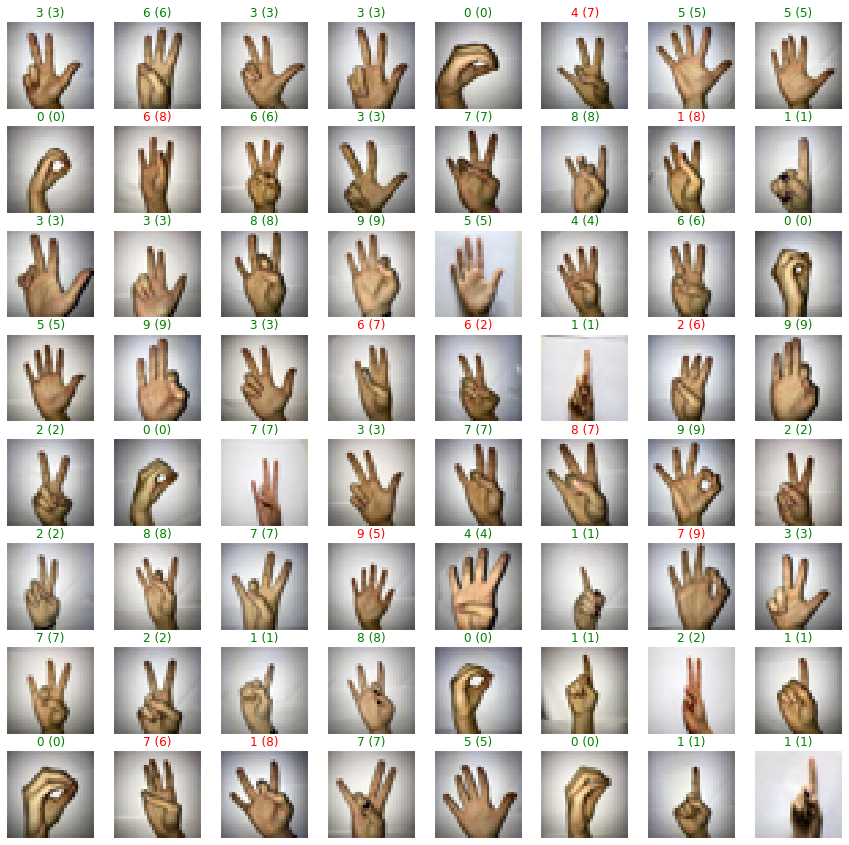

In [16]:
# посмотрим как работает нейросеть

model.show_predict_grid(X_test, y_test, size = 8)